In [1]:
import pandas as pd; import numpy as np; import tensorflow as tf

2023-10-09 16:15:03.906937: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow import keras

In [3]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(300,activation='relu',kernel_initializer='he_normal'),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(8,activation='softmax'),
                                ])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
             metrics=['accuracy'])

In [6]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [7]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3,clipvalue=1.0)

In [8]:
fashion = keras.datasets.fashion_mnist.load_data()

In [9]:
(x_train,y_train),(x_test,y_test) = fashion

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
# 数据集拆分
def split_dataset(X,y):
    y_5_or_6 = (y==5)|(y==6)
    y_A = y[~y_5_or_6]
    y_A[y_A>6] -= 2 # 将类别标签7、8、9变成5、6、7
        
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # True、False变成1、2
    return ((X[~y_5_or_6], y_A),(X[y_5_or_6], y_B))
 
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(x_train, y_train)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(x_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]
 
for i in (X_train_A, X_train_B):
    print(i.shape)

(48000, 28, 28)
(200, 28, 28)


In [12]:
history=model.fit(X_train_A,y_train_A,epochs=20,
                  validation_split=0.2,callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/20
1200/1200 [==============================] - 8s 5ms/step - loss: 0.7294 - accuracy: 0.7593 - val_loss: 0.4330 - val_accuracy: 0.8582
Epoch 2/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4354 - accuracy: 0.8557 - val_loss: 0.3604 - val_accuracy: 0.8785
Epoch 3/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3805 - accuracy: 0.8722 - val_loss: 0.3271 - val_accuracy: 0.8897
Epoch 4/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3549 - accuracy: 0.8800 - val_loss: 0.3086 - val_accuracy: 0.8946
Epoch 5/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3356 - accuracy: 0.8855 - val_loss: 0.2940 - val_accuracy: 0.8996
Epoch 6/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3220 - accuracy: 0.8911 - val_loss: 0.2845 - val_accuracy: 0.9022
Epoch 7/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3088 - accuracy: 0.8953 - val_loss: 0.2766 - val_accuracy:

In [13]:
model.save('my_model_A',save_format='tf')

INFO:tensorflow:Assets written to: my_model_A/assets


INFO:tensorflow:Assets written to: my_model_A/assets


In [14]:
model_A = keras.models.load_model('my_model_A')

In [15]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

In [16]:
loss = pd.DataFrame(history.history)

In [17]:
loss.sort_values(by=['accuracy'],ascending=False)

,loss,accuracy,val_loss,val_accuracy
18,0.243795,0.917240,0.236237,0.919479
17,0.247591,0.915417,0.238669,0.917396
19,0.243467,0.915234,0.235223,0.919583
16,0.253065,0.912865,0.239444,0.917813
15,0.254959,0.912448,0.243676,0.917292
14,0.262179,0.911354,0.243658,0.917083
13,0.264207,0.908906,0.246535,0.914375
12,0.269914,0.908880,0.248619,0.913125
11,0.273348,0.907578,0.253724,0.912917
10,0.279950,0.902682,0.256349,0.911458


In [18]:
loss.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [19]:
len(model_A.layers)

7

## Transfer Learning
General steps:
1. Choose layers from trained model_A
2. Use keras.models.clone_model() to clone model_A in case if runing new model will affect model_A
3. Use model_clone_A.set_weights(model_A.get_weights()) to copy the weights as well
4. Set up new model_B by reusing layers for model_A
5. Freeze all reused layers by setting : layers.trainable = False, then compile the molde before training the model.
6. Train the model a few epochs, then unfreeze all reused layers by setting: layers.trainable = True, then compile the model again, fiaally continue training to fine-tune the resued layers for the task.


In [20]:
model_A_clone = keras.models.clone_model(model_A) # clone_model() method clones only architecture, not the weights
model_A_clone.set_weights(model_A.get_weights()) # using set_weights() copies model_A's weights as well.

In [21]:
# reuse all low-level layers from model_A except the output layer.
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1]) 

In [22]:
model_B_on_A.add(keras.layers.Dense(1,activation='sigmoid'))

In [23]:
model_B_on_A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [24]:
model_B_on_A.layers[:-1]

In [25]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False   # freeze the reused layers.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Remember that we must always compile the model after freezing or unfreezing layers.
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [26]:
model.evaluate(X_test_A,y_test_A,return_dict=True)

250/250 [==============================] - 1s 2ms/step - loss: 0.2578 - accuracy: 0.9103


{'loss': 0.25779664516448975, 'accuracy': 0.9102500081062317}

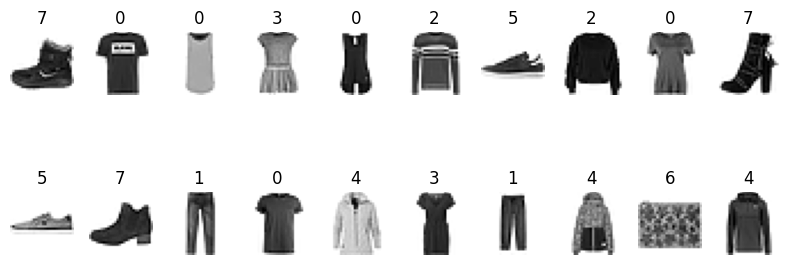

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train_A[i],cmap='binary')
    plt.title(y_train_A[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [28]:
H = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,validation_split=0.2) # train the model for a few epochs
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True   # unfreeze the reused layers.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    

Epoch 1/4
5/5 [==============================] - 1s 81ms/step - loss: 1.1520 - accuracy: 0.3125 - val_loss: 1.0841 - val_accuracy: 0.3250
Epoch 2/4
5/5 [==============================] - 0s 14ms/step - loss: 1.1250 - accuracy: 0.3375 - val_loss: 1.0572 - val_accuracy: 0.3250
Epoch 3/4
5/5 [==============================] - 0s 14ms/step - loss: 1.0989 - accuracy: 0.3750 - val_loss: 1.0312 - val_accuracy: 0.3500
Epoch 4/4
5/5 [==============================] - 0s 12ms/step - loss: 1.0739 - accuracy: 0.3938 - val_loss: 1.0060 - val_accuracy: 0.3500


In [29]:
#after unfreezing the resused layers, then continue training to fine-tune the resued layers for the task.
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16, validation_split=0.2)

Epoch 1/16
5/5 [==============================] - 2s 77ms/step - loss: 1.1829 - accuracy: 0.3000 - val_loss: 0.8430 - val_accuracy: 0.4250
Epoch 2/16
5/5 [==============================] - 0s 16ms/step - loss: 1.0359 - accuracy: 0.4125 - val_loss: 0.7216 - val_accuracy: 0.6000
Epoch 3/16
5/5 [==============================] - 0s 18ms/step - loss: 0.8676 - accuracy: 0.5250 - val_loss: 0.6320 - val_accuracy: 0.7250
Epoch 4/16
5/5 [==============================] - 0s 14ms/step - loss: 0.7456 - accuracy: 0.5750 - val_loss: 0.5629 - val_accuracy: 0.7250
Epoch 5/16
5/5 [==============================] - 0s 13ms/step - loss: 0.7192 - accuracy: 0.5938 - val_loss: 0.5089 - val_accuracy: 0.7250
Epoch 6/16
5/5 [==============================] - 0s 13ms/step - loss: 0.6084 - accuracy: 0.7000 - val_loss: 0.4668 - val_accuracy: 0.7250
Epoch 7/16
5/5 [==============================] - 0s 12ms/step - loss: 0.5487 - accuracy: 0.7125 - val_loss: 0.4302 - val_accuracy: 0.7500
Epoch 8/16
5/5 [===========

In [30]:
model_B_on_A.evaluate(X_test_B,y_test_B,return_dict=True)

63/63 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8610


{'loss': 0.3315581977367401, 'accuracy': 0.8610000014305115}

In [31]:
model_B_on_A.save('my_transfer_lerning',save_format='tf')

INFO:tensorflow:Assets written to: my_transfer_lerning/assets


INFO:tensorflow:Assets written to: my_transfer_lerning/assets


In [33]:
model_B_on_A.evaluate(X_test_B,y_test_B,return_dict=True)

63/63 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8610


{'loss': 0.3315581977367401, 'accuracy': 0.8610000014305115}